# Algorithm prototyping

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely as sh
import shapely.geometry as shg
import shapely.ops as sho

In [21]:
import pyproj
from pyproj import CRS, Transformer

In [22]:
%matplotlib inline

## Helper functions

In [39]:
crs_4326 = CRS.from_epsg(4326) # WGS84
crs_25832 = CRS.from_epsg(25832) # ETRS89 / UTM zone 32N
to_wgs_84_transformer = Transformer.from_crs(crs_25832, crs_4326)
to_utm_transformer = Transformer.from_crs(crs_4326, crs_25832)

In [23]:
df = pd.read_csv("data\extracted\dom1l-fp_32349_5660_1_nw.csv")

In [25]:
df = gpd.GeoDataFrame(df)

In [26]:
df.head()

,x,y,z,lat,lon
0,349000.0,5660017.01,43.84,51.071779,6.844637
1,349000.0,5660019.82,50.58,51.071805,6.844636
2,349000.0,5660034.90,60.41,51.071940,6.844630
3,349000.0,5660057.71,43.85,51.072145,6.844620
4,349000.0,5660058.17,43.83,51.072149,6.844620


In [51]:
# creating a geometry column 
geometry = [sh.geometry.Point(xy) for xy in zip(df['lat'], df['lon'])]

# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}

In [52]:
# Creating a Geographic data frame 
gdf = gpd.GeoDataFrame(df[["x", "y", "z"]], crs=crs, geometry=geometry)

In [53]:
gdf.head()

,x,y,z,geometry
0,349000.0,5660017.01,43.84,POINT (51.07177938107652 6.844637251506098)
1,349000.0,5660019.82,50.58,POINT (51.07180463179429 6.844636078050016)
2,349000.0,5660034.90,60.41,POINT (51.07194014098206 6.844629780612612)
3,349000.0,5660057.71,43.85,POINT (51.07214511210054 6.844620255019381)
4,349000.0,5660058.17,43.83,POINT (51.07214924566969 6.844620062919464)


In [54]:
lat_q, lon_q = 51.078534, 6.844748
query_point = shg.Point(lat_q, lon_q)

In [56]:
# filter to 200m around query point first
R = 100
query_point_xy = shg.Point(to_utm_transformer.transform(lon_q, lat_q))
query_region_xy = query_point_xy.buffer(R)
query_region_wgs84 = sho.transform(to_wgs_84_transformer.transform, query_region_xy)

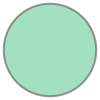

In [57]:
query_region_wgs84